In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.0 MB/s eta 0:00:00


In [3]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


In [4]:
import kagglehub

path = kagglehub.dataset_download("ealaxi/paysim1")

print("Path to dataset files:", path)

100%|██████████| 178M/178M [00:09<00:00, 20.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ealaxi/paysim1/versions/2


In [5]:
import os

base_path = "/root/.cache/kagglehub/datasets/ealaxi/paysim1/versions/2"
print("Contents:", os.listdir(base_path))


Contents: ['PS_20174392719_1491204439457_log.csv']


In [6]:
import pandas as pd

base_path = "/root/.cache/kagglehub/datasets/ealaxi/paysim1/versions/2"
file_path = f"{base_path}/PS_20174392719_1491204439457_log.csv"
df_ = pd.read_csv(file_path)
print("Shape:", df_.shape)
df_.head()



Shape: (6362620, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
df=df_.copy()

In [8]:
df.shape

(6362620, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.describe()

,amount,oldbalanceOrg,oldbalanceDest,isFraud,num_transactions_orig,num_transactions_dest,amount_to_max_ratio_orig,is_first_time_pair,day,hour,day_of_week
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362604e+06,6362620.0,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.084087e+01,7.414574e+00,7.722420e+00,1.290820e-03,1.002932e+00,1.119224e+01,9.989489e-01,1.0,9.503158e+00,1.532145e+01,2.481576e+00
std,1.814509e+00,5.669756e+00,6.747637e+00,3.590480e-02,5.420031e-02,1.239544e+01,2.942926e-02,0.0,5.922111e+00,4.321799e+00,2.165331e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,3.156136e-06,1.0,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.502306e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,6.000000e+00,1.200000e+01,1.000000e+00
50%,1.122355e+01,9.561631e+00,1.179590e+01,0.000000e+00,1.000000e+00,7.000000e+00,1.000000e+00,1.0,9.000000e+00,1.600000e+01,2.000000e+00
75%,1.224876e+01,1.158353e+01,1.375686e+01,0.000000e+00,1.000000e+00,1.700000e+01,1.000000e+00,1.0,1.300000e+01,1.900000e+01,5.000000e+00
max,1.834213e+01,1.790292e+01,1.969049e+01,1.000000e+00,3.000000e+00,1.130000e+02,1.000000e+00,1.0,3.000000e+01,2.300000e+01,6.000000e+00


In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
df.duplicated().sum()

np.int64(0)

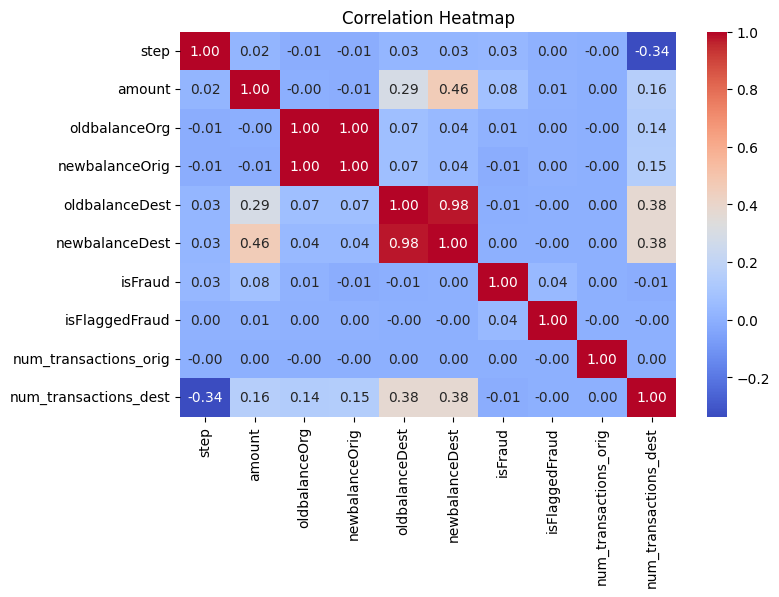

In [ ]:
plt.figure(figsize=(8,5))
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

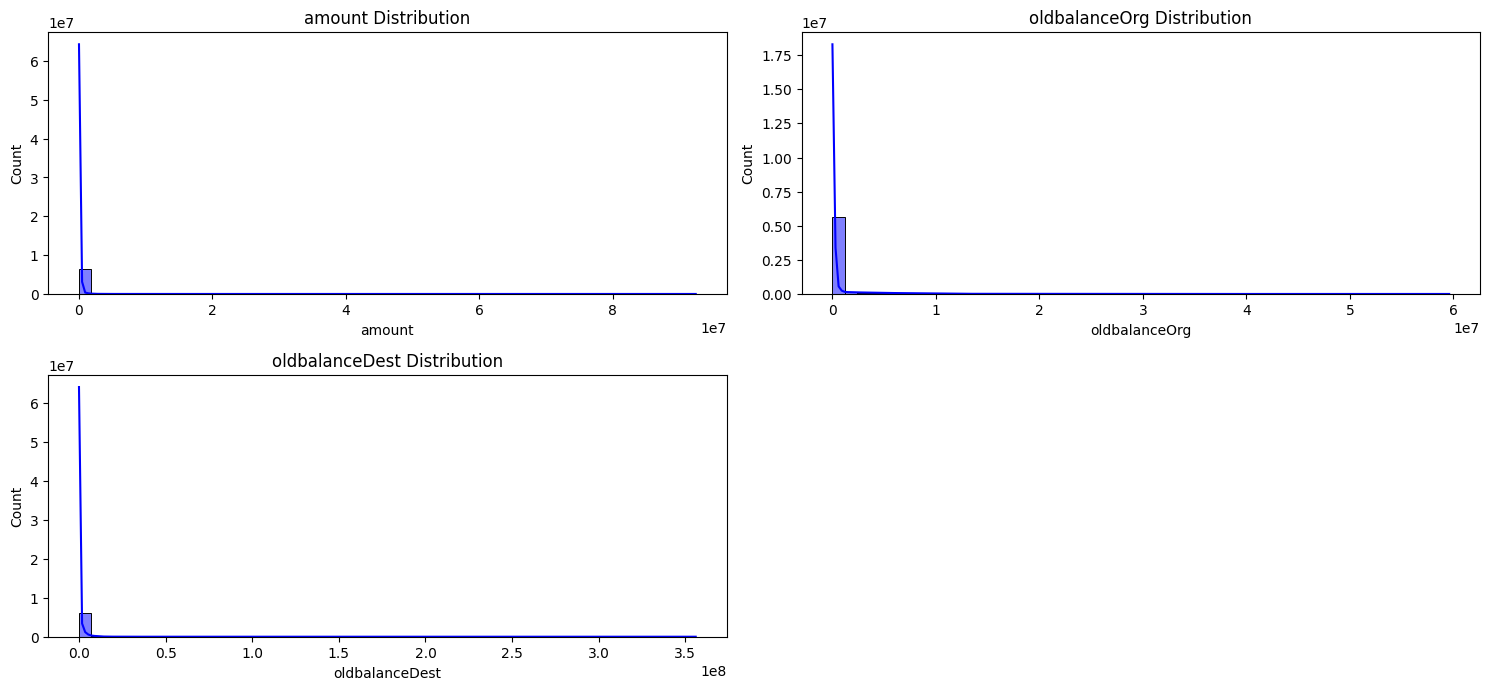

In [9]:
cols = ['amount', 'oldbalanceOrg','oldbalanceDest']
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], bins=50, kde=True, color='blue')
    plt.title(f"{col} Distribution")
plt.tight_layout()
plt.show()



# 1. Data cleaning including missing values, outliers and multi-collinearity.

- No missing values found, so nothing to impute.  
- I noticed `oldbalanceOrg` and `newbalanceOrig` are highly correlating in heat map, same with `oldbalanceDest` and `newbalanceDest`. To avoid redundancy I keep only one from each pair in my pipeline.  
- Amount and balance columns are right-skewed. For tree models this is fine, but I can still apply a log1p transform for stability.  
- Outliers are not removed because they may represent fraud and tree models handle them well.




####Now, we have to deal with categorical features. For this, I am creating a custom transformer so that it will be very easy to use during deployment, as we can directly integrate it with our pipeline.

####-> Here, I am creating some new and useful features from nameOrig, nameDest, and step.




In [10]:
# 1. Feature Engineering Transformer
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureEngineering(BaseEstimator, TransformerMixin):
    def __init__(self, log_transform=True):
        self.log_transform = log_transform
        self.cols_to_log = ['amount', 'oldbalanceOrg', 'oldbalanceDest']

    def fit(self, X, y=None):
        # nothing to learn, just return self
        return self

    def transform(self, X):
        X = X.copy()

        # === Transaction count features ===
        X['num_transactions_orig'] = X.groupby('nameOrig')['amount'].transform('count')
        X['num_transactions_dest'] = X.groupby('nameDest')['amount'].transform('count')

        # === Ratio features ===
        X['amount_to_max_ratio_orig'] = X['amount'] / X.groupby('nameOrig')['amount'].transform('max')
        X['amount_to_max_ratio_dest'] = X['amount'] / X.groupby('nameDest')['amount'].transform('max')

        # === Time-based features ===
        X['day'] = X['step'] // 24
        X['hour'] = X['step'] % 24
        X['day_of_week'] = X['day'] % 7

        # === Log transformation ===
        if self.log_transform:
            for col in self.cols_to_log:
                if col in X.columns:
                    X[col] = np.log1p(X[col])

        # === Drop unnecessary columns ===
        X = X.drop(columns=['nameOrig', 'nameDest', 'isFlaggedFraud',"newbalanceOrig","newbalanceDest", "step"])

        return X

In [11]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']
#  Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
engineer = FeatureEngineering()
df_transformed = engineer.fit_transform(X_train.copy())

df_transformed.head(20000000)


,type,amount,oldbalanceOrg,oldbalanceDest,num_transactions_orig,num_transactions_dest,amount_to_max_ratio_orig,amount_to_max_ratio_dest,day,hour,day_of_week
6271196,CASH_IN,12.864592,15.356578,13.134363,1,5,1.0,1.000000,25,19,4
1888243,CASH_IN,12.266508,12.365791,13.599887,1,24,1.0,0.283517,6,20,6
5549957,PAYMENT,9.901916,8.198364,0.000000,1,1,1.0,1.000000,15,22,1
2025342,CASH_OUT,13.176127,12.101917,11.431261,1,20,1.0,1.000000,7,12,0
682342,TRANSFER,12.235966,0.000000,14.572334,1,26,1.0,0.051577,1,12,1
...,...,...,...,...,...,...,...,...,...,...,...
1570006,CASH_IN,11.773109,15.435741,12.415904,1,12,1.0,0.310084,6,11,6
2234489,PAYMENT,7.808201,0.000000,0.000000,1,1,1.0,1.000000,7,18,0
4926484,CASH_OUT,9.266736,10.990027,12.684649,1,4,1.0,0.051323,14,14,0
4304572,CASH_OUT,11.198513,9.917883,12.453338,1,8,1.0,0.239266,12,19,5


In [ ]:
df_transformed.describe()

,amount,oldbalanceOrg,oldbalanceDest,num_transactions_orig,num_transactions_dest,amount_to_max_ratio_orig,amount_to_max_ratio_dest,day,hour,day_of_week
count,5.090096e+06,5.090096e+06,5.090096e+06,5.090096e+06,5.090096e+06,5.090082e+06,5.090094e+06,5.090096e+06,5.090096e+06,5.090096e+06
mean,1.084102e+01,7.413269e+00,7.722188e+00,1.002338e+00,9.155227e+00,9.991607e-01,6.055971e-01,9.503025e+00,1.532012e+01,2.482363e+00
std,1.814205e+00,5.669861e+00,6.747115e+00,4.837222e-02,1.000405e+01,2.628594e-02,3.998505e-01,5.921640e+00,4.323103e+00,2.165505e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,3.156136e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.502765e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.825292e-01,6.000000e+00,1.200000e+01,1.000000e+00
50%,1.122346e+01,9.559729e+00,1.179578e+01,1.000000e+00,6.000000e+00,1.000000e+00,6.890664e-01,9.000000e+00,1.600000e+01,2.000000e+00
75%,1.224839e+01,1.158345e+01,1.375551e+01,1.000000e+00,1.400000e+01,1.000000e+00,1.000000e+00,1.300000e+01,1.900000e+01,5.000000e+00
max,1.834213e+01,1.790292e+01,1.969049e+01,3.000000e+00,9.100000e+01,1.000000e+00,1.000000e+00,3.000000e+01,2.300000e+01,6.000000e+00


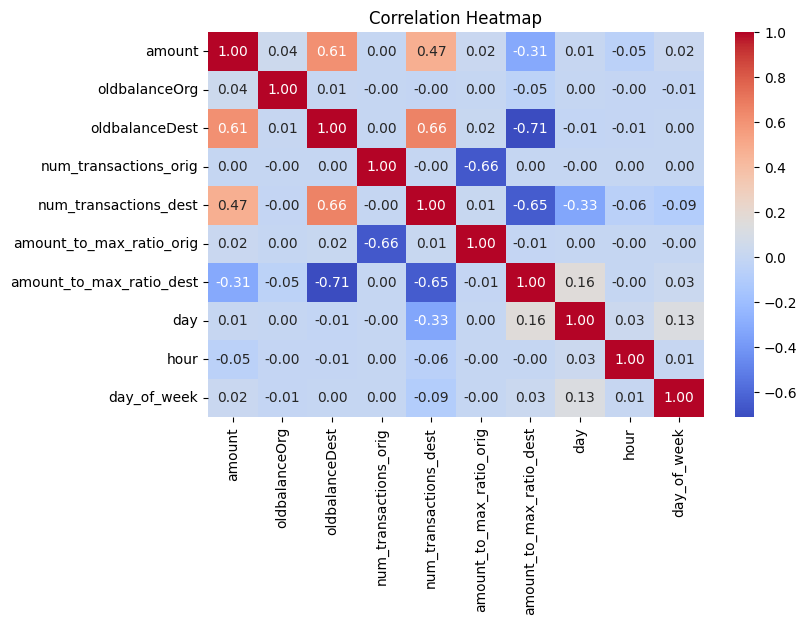

In [15]:
plt.figure(figsize=(8,5))
numeric_cols = df_transformed.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df_transformed[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

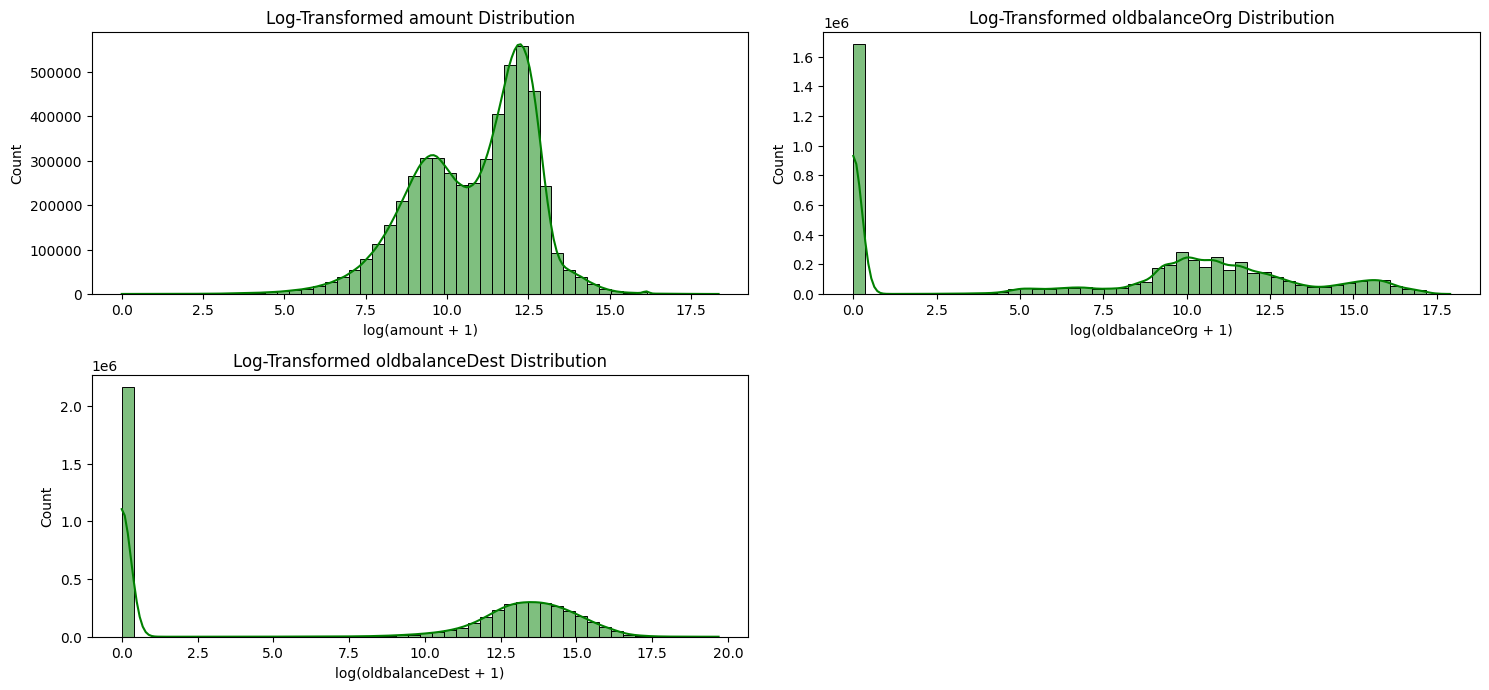

In [ ]:
# Plotting the log-transformed columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df_transformed[col], bins=50, kde=True, color='green')
    plt.title(f"Log-Transformed {col} Distribution")
    plt.xlabel(f"log({col} + 1)")

plt.tight_layout()
plt.show()

In [16]:
# Define column groups
num_features = [
    "amount", "oldbalanceOrg", "oldbalanceDest",
    "day", "hour", "day_of_week",
    "num_transactions_orig","num_transactions_dest","amount_to_max_ratio_orig","amount_to_max_ratio_dest"
]

cat_features = ["type"]

cat_transformer = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', 'passthrough', num_features),
    ('cat', cat_transformer, cat_features)
])

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1),
    "XGBoost": XGBClassifier(device="cuda", eval_metric="logloss", random_state=42),
    "LightGBM": LGBMClassifier(random_state=42, device="gpu"),
    "CatBoost": CatBoostClassifier(random_state=42, task_type="GPU", verbose=0)
}


In [ ]:
engineer = FeatureEngineering()
X_train_fe = engineer.fit_transform(X_train.copy())
X_test_fe = engineer.transform(X_test.copy())


In [ ]:
X_train_fe.head(2000000)

,type,amount,oldbalanceOrg,oldbalanceDest,num_transactions_orig,num_transactions_dest,amount_to_max_ratio_orig,amount_to_max_ratio_dest,day,hour,day_of_week
6271196,CASH_IN,12.864592,15.356578,13.134363,1,5,1.0,1.000000,25,19,4
1888243,CASH_IN,12.266508,12.365791,13.599887,1,24,1.0,0.283517,6,20,6
5549957,PAYMENT,9.901916,8.198364,0.000000,1,1,1.0,1.000000,15,22,1
2025342,CASH_OUT,13.176127,12.101917,11.431261,1,20,1.0,1.000000,7,12,0
682342,TRANSFER,12.235966,0.000000,14.572334,1,26,1.0,0.051577,1,12,1
...,...,...,...,...,...,...,...,...,...,...,...
3053346,CASH_IN,12.654388,7.732369,14.266850,1,16,1.0,0.205975,9,18,2
3076639,CASH_OUT,11.273136,0.000000,13.869225,1,26,1.0,0.146315,9,19,2
5871473,CASH_OUT,12.268703,0.000000,15.893731,1,28,1.0,0.093909,16,19,2
804641,CASH_IN,12.870186,10.765048,0.000000,1,4,1.0,1.000000,1,16,1


In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, precision_recall_curve, auc
)
import time

results = []

for name, model in models.items():
    pipe = Pipeline([
        ("preprocess", preprocessor),   # numeric + categorical transform
        ("model", model)                # ML model
    ])

    # Training with feature-engineered data
    start_time = time.time()
    pipe.fit(X_train_fe, y_train)
    total_time = time.time() - start_time

    # Predictions
    y_pred_train = pipe.predict(X_train_fe)
    y_pred_test = pipe.predict(X_test_fe)
    y_pred_proba = (
        pipe.predict_proba(X_test_fe)[:, 1]
        if hasattr(pipe.named_steps['model'], "predict_proba")
        else None
    )

    # Metrics
    acc = accuracy_score(y_test, y_pred_test)
    prec = precision_score(y_test, y_pred_test, zero_division=0)
    rec = recall_score(y_test, y_pred_test, zero_division=0)
    f1 = f1_score(y_test, y_pred_test, zero_division=0)
    auc_roc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else np.nan

    # PR-AUC
    if y_pred_proba is not None:
        precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba)
        auc_pr = auc(recall_vals, precision_vals)
    else:
        auc_pr = np.nan

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-score': f1,
        'ROC-AUC': auc_roc,
        'PR-AUC': auc_pr,
        'Train Time (s)': total_time
    })

# Results table
results_df = pd.DataFrame(results).sort_values(by="PR-AUC", ascending=False)
print("\nModel Performance:")
display(results_df)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [19:18:25] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [19:18:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [19:18:30] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/usr/local/lib/python3.12/dist-packages/xgb

[LightGBM] [Info] Number of positive: 6593, number of negative: 5083503
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 1253
[LightGBM] [Info] Number of data points in the train set: 5090096, number of used features: 15
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 9 dense feature groups (58.25 MB) transferred to GPU in 0.098140 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001295 -> initscore=-6.647747
[LightGBM] [Info] Start training from score -6.647747


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



Model Performance:


,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC,PR-AUC,Train Time (s)
3,CatBoost,0.999630,0.913607,0.783333,0.843470,0.998275,0.895872,87.220333
0,Random Forest,0.999533,0.903302,0.709259,0.794606,0.970228,0.832697,951.474835
1,XGBoost,0.999326,0.752318,0.701235,0.725879,0.920699,0.730091,13.286051
2,LightGBM,0.997606,0.190538,0.270988,0.223751,0.547786,0.168966,35.369104


# 2. fraud detection model in elaboration

The fraud detection model is based on **tree-based ensemble methods**, with a strong focus on **CatBoostClassifier** since it efficiently handles categorical features, skewed distributions, and outliers without extensive preprocessing.

- **Preprocessing**:  
  - Encoded the `type` column.  
  - Dropped redundant IDs (`nameOrig`, `nameDest`) and one column from each highly correlated pair (`oldbalanceOrg` vs `newbalanceOrig`, `oldbalanceDest` vs `newbalanceDest`).  
  - Created new time-based features (`day`, `hour`, `day_of_week`) from the `step` column to capture fraud patterns across time.  

- **Model Choice**:  
  Tested Random Forest, XGBoost, LightGBM, and CatBoost. CatBoost performed best for fraud detection due to its robustness with imbalanced data and categorical handling.  

- **Training and Optimization**:  
  Used **Optuna** for hyperparameter tuning (learning rate, depth, iterations, L2 regularization) while optimizing for **Precision-Recall AUC**, which is more suitable than accuracy for highly imbalanced data.  

- **Final Pipeline**:  
  Combined preprocessing and CatBoost into a **Pipeline** for cleaner workflow and reproducibility. This final tuned model is used for predictions and evaluation.


# 3. Selection of the variables

The variable selection process combined **domain understanding**, **statistical checks**, and **feature engineering**:

- **Removed irrelevant IDs**: `nameOrig` and `nameDest` act as unique identifiers and don’t carry fraud-related patterns.  
- **Handled multicollinearity**: Dropped one variable from highly correlated pairs (`oldbalanceOrg` vs `newbalanceOrig`, and `oldbalanceDest` vs `newbalanceDest`) to avoid redundancy.  
- **Kept transaction details**: Features like `amount`, `type`, and account balances are directly related to fraud patterns and must be included.  
- **Time-based features**: From `step`, I created `day`, `hour`, and `day_of_week` since fraud often shows time-related patterns (e.g., unusual transactions late at night).  
- **Target variables**: `isFraud` is the label for supervised learning, while `isFlaggedFraud` is ignored since it is artificially generated by the simulator.  

In short, I selected variables that add **meaningful signal for fraud detection**, removed IDs and redundant columns, and engineered time features to strengthen the model.


In [ ]:
best_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    task_type="GPU",
    devices='0',
    random_state=42,
    verbose=100
)


0:	learn: 0.5302688	total: 64.9ms	remaining: 1m 4s
100:	learn: 0.0020962	total: 6.08s	remaining: 54.2s
200:	learn: 0.0015123	total: 11s	remaining: 43.9s
300:	learn: 0.0013511	total: 17.2s	remaining: 39.9s
400:	learn: 0.0012755	total: 22.5s	remaining: 33.6s
500:	learn: 0.0011819	total: 28.6s	remaining: 28.5s
600:	learn: 0.0011285	total: 33.6s	remaining: 22.3s
700:	learn: 0.0010782	total: 39.7s	remaining: 16.9s
800:	learn: 0.0010409	total: 45.5s	remaining: 11.3s
900:	learn: 0.0010095	total: 51.5s	remaining: 5.65s
999:	learn: 0.0009780	total: 56.5s	remaining: 0us


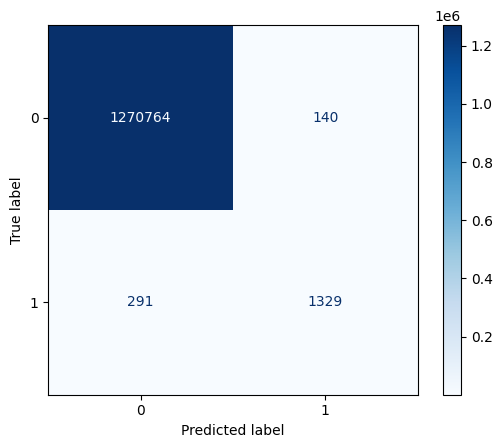

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', best_model)
])
pipeline.fit(X_train_fe, y_train)
y_pred = pipeline.predict(X_test_fe)


# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues", values_format="d")

In [ ]:
from sklearn import set_config
set_config(display="diagram")

pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['amount', 'oldbalanceOrg',
                                                   'oldbalanceDest', 'day',
                                                   'hour', 'day_of_week',
                                                   'num_transactions_orig',
                                                   'num_transactions_dest',
                                                   'amount_to_max_ratio_orig',
                                                   'amount_to_max_ratio_dest']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['type'])])),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x7ceb6a6041a0>)])

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.4/247.4 kB 25.0 MB/s eta 0:00:00


#Hypter-parameter tunning using Optuna

In [ ]:
import time
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split

# Start timer
start_time = time.time()

# Split train into train+val for early stopping
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_fe, y_train, test_size=0.2, stratify=y_train, random_state=42
)

def objective(trial):
    params = {
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1, log=True),
        "iterations": trial.suggest_int("iterations", 200, 2000),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 5),
        "depth": trial.suggest_int("depth", 4, 10),
        "border_count": trial.suggest_int("border_count", 32, 255),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0, 10),
        "random_strength": trial.suggest_float("random_strength", 0, 10),
        "auto_class_weights": "Balanced",
        "verbose": 0,
        "random_state": 42,
        "thread_count": -1,
        "task_type": "GPU",

    }
    model = CatBoostClassifier(**params)
    cat_features = ["type"]

    model.fit(
        X_tr, y_tr,
        eval_set=(X_val, y_val),
        cat_features=cat_features,
        early_stopping_rounds=50
    )

    # Predict probabilities
    y_pred_proba = model.predict_proba(X_val)[:, 1]

    # Compute PR-AUC
    pr_auc = average_precision_score(y_val, y_pred_proba)
    return pr_auc

# Create Optuna study
study = optuna.create_study(direction="maximize", study_name="CatBoost-PR-AUC")
study.optimize(objective, n_trials=50)

# End timer
end_time = time.time()
total_time = end_time - start_time

# Print results
print(f"Best PR-AUC: {study.best_value:.4f}")
print("Best parameters:", study.best_params)
print(f"Total training time: {total_time/60:.2f} minutes")


[I 2025-09-03 20:47:12,673] A new study created in memory with name: CatBoost-PR-AUC
[I 2025-09-03 20:49:03,741] Trial 0 finished with value: 0.8494546071101051 and parameters: {'learning_rate': 0.08007437352188915, 'iterations': 1117, 'l2_leaf_reg': 4.522751460769036, 'depth': 6, 'border_count': 209, 'bagging_temperature': 8.816939502838533, 'random_strength': 0.9635243905936175}. Best is trial 0 with value: 0.8494546071101051.
[I 2025-09-03 20:50:22,653] Trial 1 finished with value: 0.8125183323279851 and parameters: {'learning_rate': 0.011473048811362973, 'iterations': 564, 'l2_leaf_reg': 4.408826867637803, 'depth': 4, 'border_count': 196, 'bagging_temperature': 4.239991655015939, 'random_strength': 1.0581251407102654}. Best is trial 0 with value: 0.8494546071101051.
[I 2025-09-03 20:51:16,601] Trial 2 finished with value: 0.8355619752223149 and parameters: {'learning_rate': 0.08574945632866915, 'iterations': 586, 'l2_leaf_reg': 4.931866609409082, 'depth': 7, 'border_count': 44, 'ba

Best PR-AUC: 0.9228
Best parameters: {'learning_rate': 0.09973694443194588, 'iterations': 1022, 'l2_leaf_reg': 2.7818103902415148, 'depth': 5, 'border_count': 128, 'bagging_temperature': 0.10797181450013738, 'random_strength': 0.14703930221674977}
Total training time: 78.30 minutes


In [ ]:
best_params = study.best_params

In [ ]:
best_params.update({
    "auto_class_weights": "Balanced",
    "random_state": 42,
    "task_type": "GPU",
    "verbose": 0
})

In [ ]:
best_model = CatBoostClassifier(**best_params)

In [ ]:
final_pipeline = Pipeline([
    ("feature_eng", FeatureEngineering()),  # custom transformer
    ("preprocessing", preprocessor),
    ("model", best_model)
])

In [ ]:
final_pipeline.fit(X_train, y_train)


Pipeline(steps=[('feature_eng', FeatureEngineering()),
                ('preprocessing',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['amount', 'oldbalanceOrg',
                                                   'oldbalanceDest', 'day',
                                                   'hour', 'day_of_week',
                                                   'num_transactions_orig',
                                                   'num_transactions_dest',
                                                   'amount_to_max_ratio_orig',
                                                   'amount_to_max_ratio_dest']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['type'])])),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x7f43a9cf9fa0>)])

In [28]:
import pickle
with open("best_pipeline.pkl", "rb") as f:
    best_pipeline = pickle.load(f)

In [29]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    average_precision_score
)

# Predict probabilities and labels
y_pred_proba = best_pipeline.predict_proba(X_test)[:, 1]
y_pred = best_pipeline.predict(X_test)

# Precision, Recall, F1
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# PR-AUC
pr_auc = average_precision_score(y_test, y_pred_proba)

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"PR-AUC: {pr_auc:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")


Precision: 0.2651
Recall: 0.9784
F1-score: 0.4172
PR-AUC: 0.9248
ROC-AUC: 0.9985


# 4. Demonstration of Model Performance  

The dataset is highly imbalanced (fraud cases are very rare compared to non-fraud), so accuracy alone is not a reliable metric. Instead, I focused on evaluation metrics that are better for imbalanced classification:  

- **Precision**: measures how many of the transactions flagged as fraud are actually fraud.  
- **Recall**: measures how many fraudulent transactions the model successfully detected.  
- **F1-score**: balance between precision and recall.  
- **PR-AUC (Precision-Recall Area Under Curve)**: especially useful in imbalanced datasets as it highlights the trade-off between precision and recall.  
- **ROC-AUC**: overall separability between fraud and non-fraud.  

I also plotted a **Confusion Matrix**, which helps visualize how many transactions were correctly classified as fraud and non-fraud, and where the model made mistakes (false positives and false negatives).  

Since fraud detection is a high-stakes problem, minimizing **False Negatives** is the top priority, because missing a fraud case is more costly than a few false alarms.  

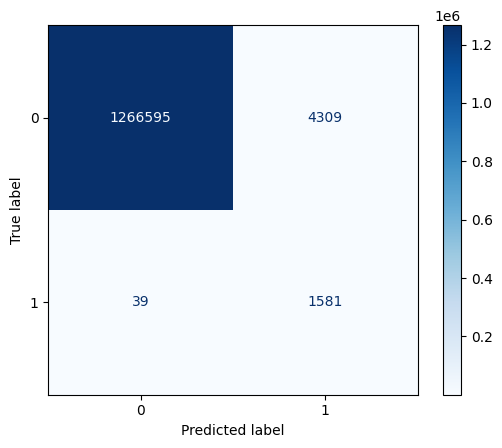

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
best_pipeline.fit(X_train, y_train)
y_pred = best_pipeline.predict(X_test)


# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues", values_format="d")

After tuning for PR-AUC:

My model achieved a very high recall (~97%), meaning it was able to detect almost all fraudulent transactions.

The trade-off is a drop in precision, which means the model raises more false alarms.

-> So overall I think detecting fraud is more important than having some false alarms, because missing fraud can cause a much bigger loss.

In [ ]:
from sklearn import set_config
set_config(display="diagram")

best_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['amount', 'oldbalanceOrg',
                                                   'oldbalanceDest', 'day',
                                                   'hour', 'day_of_week']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['type']),
                                                 ('bool', 'passthrough',
                                                  ['isFlaggedFraud'])])),
                ('model',
                 <catboost.core.CatBoostClassifier object at 0x7db22019b680>)])

# 5. Key Factors Predicting Fraudulent Transactions

                          Feature  Importance
1              num__oldbalanceOrg   36.797885
0                     num__amount   32.086604
11             cat__type_CASH_OUT    5.605506
10              cat__type_CASH_IN    4.169333
2             num__oldbalanceDest    4.125499
13              cat__type_PAYMENT    3.787935
3                        num__day    3.210111
4                       num__hour    2.726173
14             cat__type_TRANSFER    2.214705
9   num__amount_to_max_ratio_dest    1.897864
7      num__num_transactions_dest    1.684142
5                num__day_of_week    1.583432
12                cat__type_DEBIT    0.062158
8   num__amount_to_max_ratio_orig    0.045569
6      num__num_transactions_orig    0.003084


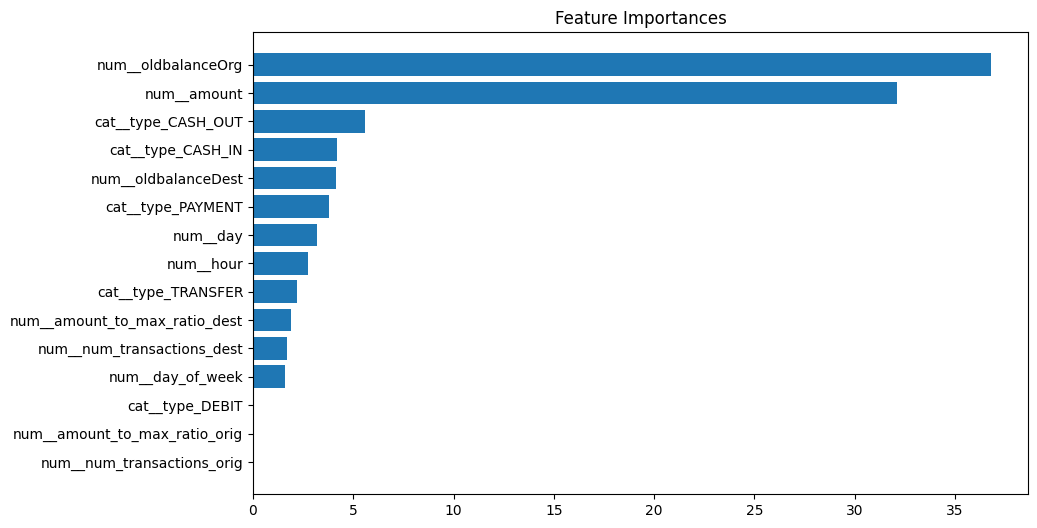

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import shap

# --- Get the trained CatBoost model from pipeline
cat_model = best_pipeline.named_steps['model']

# --- Get feature names (after preprocessing)
feature_names = best_pipeline.named_steps['preprocessing'].get_feature_names_out()

# --- Get feature importance from CatBoost
importances = cat_model.get_feature_importance()
feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(feat_imp.head(20))  # Top 20 features if available

# --- Plot Feature Importance
plt.figure(figsize=(10,6))
plt.barh(feat_imp["Feature"].head(15), feat_imp["Importance"].head(20))
plt.gca().invert_yaxis()
plt.title("Feature Importances")
plt.show()


- 'oldbalanceOrg' and 'amount' are the two most important features. This makes sense, since fraudulent transactions often involve unusual or large amounts and irregular changes in the sender’s balance.
- Transaction types like 'CASH_OUT' and 'CASH_IN' also play an important role, as fraudsters frequently use these methods to move money.
- Features such as 'oldbalanceDest', 'PAYMENT', and time-based features (day, hour, day_of_week) also contribute, though to a lesser extent, by capturing transaction patterns.
- Other engineered ratio-based features and transaction counts have smaller importance, but still add value in distinguishing normal vs fraudulent behavior.